# Federico Ariton
### Master in Data Analytics
### CA 2 Integrated
### Student Number:sba22090

In [2]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Correct file paths for the uploaded files
file_paths = {
    "prices": "Preparation_Merge/prices.csv",
    "production": "Preparation_Merge/production.csv",
    "trade": "Preparation_Merge/trade.csv",
    "value": "Preparation_Merge/value.csv",
}

# Load datasets into a dictionary for easy access
datasets = {}
for name, path in file_paths.items():
    try:
        # Attempt to read the dataset
        datasets[name] = pd.read_csv(path, encoding='latin1')
        print(f"Loaded dataset: {name}")
    except Exception as e:
        print(f"Failed to load {name}: {e}")

# Display a sample from each successfully loaded dataset
for name, df in datasets.items():
    print(f"\nDataset: {name}")

Loaded dataset: prices
Loaded dataset: production
Loaded dataset: trade
Loaded dataset: value

Dataset: prices

Dataset: production

Dataset: trade

Dataset: value


In [3]:
globals().update(datasets)

# Print the names of the datasets from the dictionary
print("Datasets available:")
for name in datasets.keys():
    print(name)


Datasets available:
prices
production
trade
value


In [4]:
# Merging the datasets on 'Year', 'Area', and 'Item'
merged_data = pd.merge(production, trade, on=['Year', 'Area', 'Item'], how='inner')

In [5]:
trade

,Area,Item,Year,Export Quantity (t),Export Value (1000 USD),Import Quantity (t),Import Value (1000 USD)
0,Argentina,Barley,2000,36926.56,4991.0,16563.52,2718.0
1,Argentina,Barley,2001,201329.00,27320.0,115.00,9.0
2,Argentina,Barley,2002,112898.00,15903.0,85.00,13.0
3,Argentina,Barley,2003,66150.00,9731.0,59.00,20.0
4,Argentina,Barley,2004,196665.00,31781.0,78.00,21.0
...,...,...,...,...,...,...,...
3537,United States of America,Wheat,2018,22499005.58,5458267.0,3136160.61,799371.0
3538,United States of America,Wheat,2019,27068607.39,6265916.0,1836134.40,432372.0
3539,United States of America,Wheat,2020,26131625.60,6318111.0,1909894.95,467784.0
3540,United States of America,Wheat,2021,24014160.15,7286461.0,1450818.24,402258.0


In [6]:
merged_data

,Year,Area,Item,Production Value (t),Export Quantity (t),Export Value (1000 USD),Import Quantity (t),Import Value (1000 USD)
0,2000,Argentina,Barley,7.224900e+05,3.692656e+04,4.991000e+03,1.656352e+04,2.718000e+03
1,2000,Argentina,"Cereals, primary",3.798392e+07,2.293202e+07,2.336237e+06,2.833311e+04,1.918204e+04
2,2000,Argentina,"Hen eggs in shell, fresh",6.165055e+06,2.985000e+01,7.400000e+01,2.394270e+03,4.389000e+03
3,2000,Argentina,"Meat, Total",4.101293e+06,3.934835e+04,8.169969e+04,9.885381e+03,1.117463e+04
4,2000,Argentina,"Milk, Total",1.012133e+07,9.855644e+05,2.516204e+05,4.736500e+03,2.499450e+03
...,...,...,...,...,...,...,...,...
3537,2022,United States of America,"Hen eggs in shell, fresh",1.160425e+08,1.064611e+05,5.420220e+05,9.523350e+03,7.932700e+04
3538,2022,United States of America,"Meat, Total",4.753073e+07,7.007465e+05,1.790984e+06,1.652284e+05,1.004498e+06
3539,2022,United States of America,"Milk, Total",1.027473e+08,7.504596e+06,4.064700e+06,5.763912e+05,1.085003e+06
3540,2022,United States of America,Raw milk of cattle,1.027216e+08,1.124999e+05,1.110810e+05,1.817909e+04,1.830300e+04


In [7]:
# Checking for missing values in the merged dataset
missing_values_summary = merged_data.isnull().sum()

# Display the missing values summary to the user
missing_values_summary


Year                       0
Area                       0
Item                       0
Production Value (t)       0
Export Quantity (t)        0
Export Value (1000 USD)    0
Import Quantity (t)        0
Import Value (1000 USD)    0
dtype: int64

In [8]:
# Merge the values dataset with the existing merged_data
merged_with_values = pd.merge(merged_data, value, on=['Year', 'Area', 'Item'], how='left')
merged_with_values

,Year,Area,Item,Production Value (t),Export Quantity (t),Export Value (1000 USD),Import Quantity (t),Import Value (1000 USD),GPV (1000 USD),GPV_Const (1000 USD)
0,2000,Argentina,Barley,7.224900e+05,3.692656e+04,4.991000e+03,1.656352e+04,2.718000e+03,70117.0,9.677100e+04
1,2000,Argentina,"Cereals, primary",3.798392e+07,2.293202e+07,2.336237e+06,2.833311e+04,1.918204e+04,3522037.0,6.251729e+06
2,2000,Argentina,"Hen eggs in shell, fresh",6.165055e+06,2.985000e+01,7.400000e+01,2.394270e+03,4.389000e+03,243361.0,3.696640e+05
3,2000,Argentina,"Meat, Total",4.101293e+06,3.934835e+04,8.169969e+04,9.885381e+03,1.117463e+04,6505490.0,4.934871e+06
4,2000,Argentina,"Milk, Total",1.012133e+07,9.855644e+05,2.516204e+05,4.736500e+03,2.499450e+03,1569591.0,3.467487e+06
...,...,...,...,...,...,...,...,...,...,...
3537,2022,United States of America,"Hen eggs in shell, fresh",1.160425e+08,1.064611e+05,5.420220e+05,9.523350e+03,7.932700e+04,20341512.0,1.122442e+07
3538,2022,United States of America,"Meat, Total",4.753073e+07,7.007465e+05,1.790984e+06,1.652284e+05,1.004498e+06,125670152.0,2.766280e+07
3539,2022,United States of America,"Milk, Total",1.027473e+08,7.504596e+06,4.064700e+06,5.763912e+05,1.085003e+06,57498702.0,4.348546e+07
3540,2022,United States of America,Raw milk of cattle,1.027216e+08,1.124999e+05,1.110810e+05,1.817909e+04,1.830300e+04,57498702.0,4.348546e+07


In [9]:
# Checking for missing values in the merged dataset
missing_values_summary = merged_with_values.isnull().sum()

# Display the missing values summary to the user
missing_values_summary


Year                         0
Area                         0
Item                         0
Production Value (t)         0
Export Quantity (t)          0
Export Value (1000 USD)      0
Import Quantity (t)          0
Import Value (1000 USD)      0
GPV (1000 USD)             280
GPV_Const (1000 USD)       280
dtype: int64

In [10]:
# Identify rows with missing values in the newly merged dataset
missing_values_rows = merged_with_values[merged_with_values.isnull().any(axis=1)][['Year', 'Area']]
# Create a table to show missing values for each year starting from 2000
missing_values_by_year = (
    missing_values_rows['Year']
    .value_counts()
    .reindex(range(2000, missing_values_rows['Year'].max() + 1), fill_value=0)
    .reset_index()
)

missing_values_by_year.columns = ['Year', 'Missing Values']
missing_values_by_year

,Year,Missing Values
0,2000,0
1,2001,0
2,2002,0
3,2003,0
4,2004,0
5,2005,0
6,2006,0
7,2007,0
8,2008,0
9,2009,0


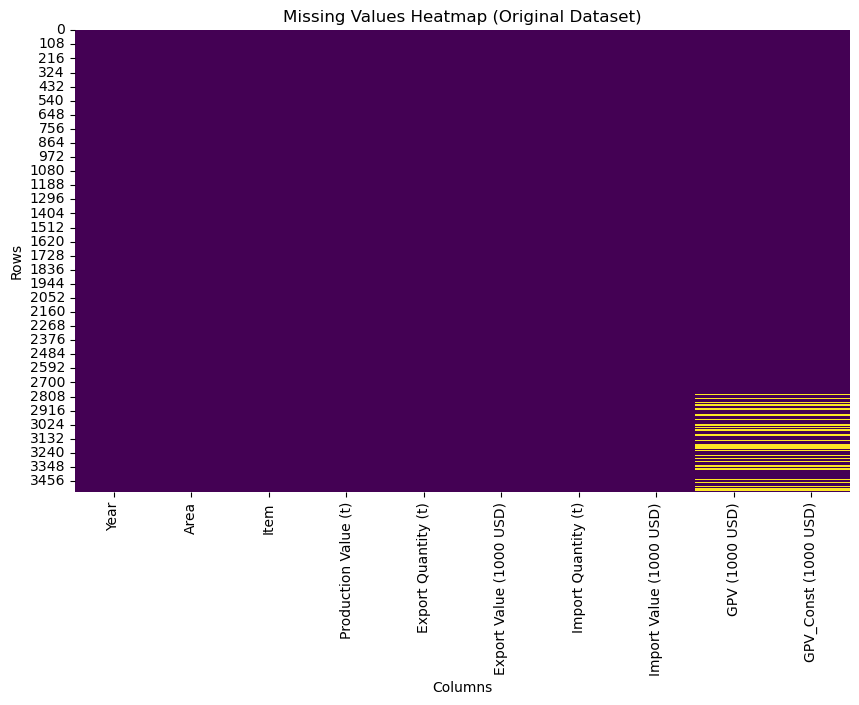

In [11]:
# Visualize missing values in the new dataset
plt.figure(figsize=(10, 6))
sns.heatmap(merged_with_values.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Original Dataset)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

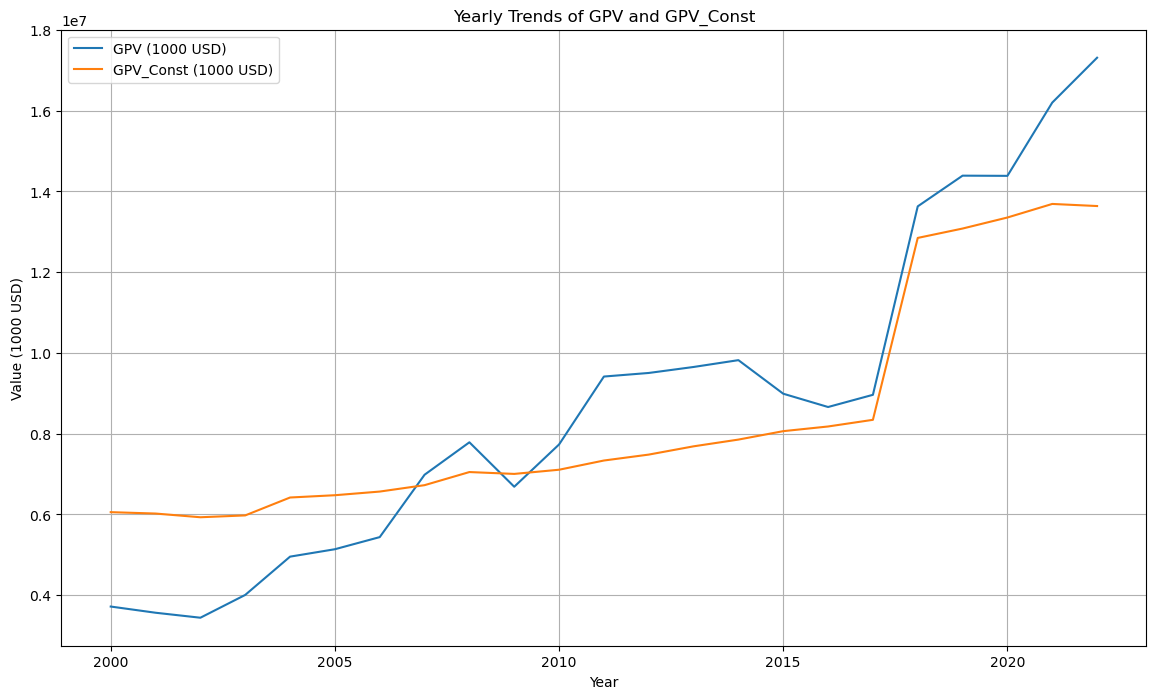

In [12]:
# Visualize 'GPV (1000 USD)' and 'GPV_Const (1000 USD)' change over the years
plt.figure(figsize=(14, 8))

# Aggregate the data to see yearly trends
gpv_trends = merged_with_values.groupby('Year')[['GPV (1000 USD)', 'GPV_Const (1000 USD)']].mean()

# Plot the trends
gpv_trends.plot(ax=plt.gca())
plt.title("Yearly Trends of GPV and GPV_Const")
plt.xlabel("Year")
plt.ylabel("Value (1000 USD)")
plt.legend(["GPV (1000 USD)", "GPV_Const (1000 USD)"])
plt.grid(True)
plt.show()

In [13]:
# Handle missing values using the same trend-based imputation method
for column in ['GPV (1000 USD)', 'GPV_Const (1000 USD)']:
    merged_with_values[column] = merged_with_values.groupby('Year')[column].transform(
        lambda x: x.fillna(x.mean(skipna=True))
    )

# Verify if missing values are handled
missing_after_imputation_new = merged_with_values[['GPV (1000 USD)', 'GPV_Const (1000 USD)']].isnull().sum()
missing_after_imputation_new

GPV (1000 USD)          0
GPV_Const (1000 USD)    0
dtype: int64

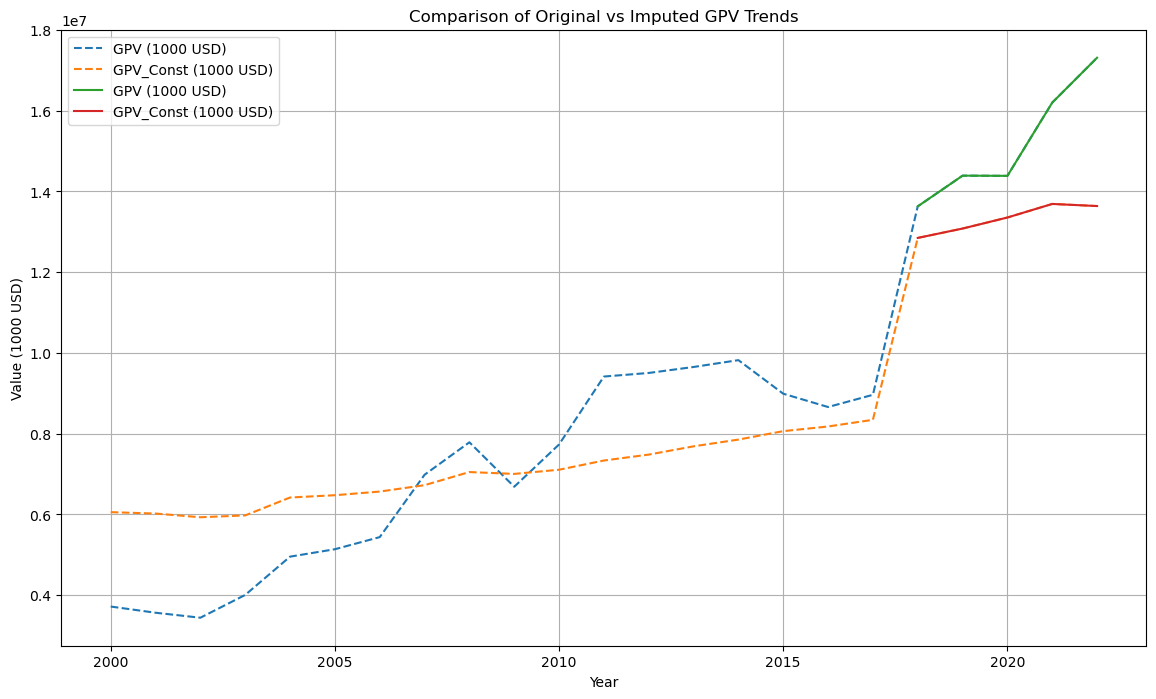

In [14]:
# Separate rows where values were originally missing (imputed)
imputed_rows = merged_with_values[merged_with_values['Year'].isin([2018, 2019, 2020, 2021, 2022])]

# Plot imputed data trends against overall trends
plt.figure(figsize=(14, 8))

# Original trends for reference
gpv_trends_original = merged_with_values.groupby('Year')[['GPV (1000 USD)', 'GPV_Const (1000 USD)']].mean()
gpv_trends_original.plot(ax=plt.gca(), style='--', label=['Original GPV', 'Original GPV_Const'])

# Imputed data trends
gpv_trends_imputed = imputed_rows.groupby('Year')[['GPV (1000 USD)', 'GPV_Const (1000 USD)']].mean()
gpv_trends_imputed.plot(ax=plt.gca(), style='-', label=['Imputed GPV', 'Imputed GPV_Const'])

plt.title("Comparison of Original vs Imputed GPV Trends")
plt.xlabel("Year")
plt.ylabel("Value (1000 USD)")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Merge the values dataset with the existing merged_data
final_dataset = pd.merge(merged_with_values, prices, on=['Year', 'Area', 'Item'], how='left')
final_dataset

,Year,Area,Item,Production Value (t),Export Quantity (t),Export Value (1000 USD),Import Quantity (t),Import Value (1000 USD),GPV (1000 USD),GPV_Const (1000 USD),Producer Price (USD/tonne)
0,2000,Argentina,Barley,7.224900e+05,3.692656e+04,4.991000e+03,1.656352e+04,2.718000e+03,70117.0,9.677100e+04,97.000000
1,2000,Argentina,"Cereals, primary",3.798392e+07,2.293202e+07,2.336237e+06,2.833311e+04,1.918204e+04,3522037.0,6.251729e+06,95.185714
2,2000,Argentina,"Hen eggs in shell, fresh",6.165055e+06,2.985000e+01,7.400000e+01,2.394270e+03,4.389000e+03,243361.0,3.696640e+05,744.400000
3,2000,Argentina,"Meat, Total",4.101293e+06,3.934835e+04,8.169969e+04,9.885381e+03,1.117463e+04,6505490.0,4.934871e+06,1354.260000
4,2000,Argentina,"Milk, Total",1.012133e+07,9.855644e+05,2.516204e+05,4.736500e+03,2.499450e+03,1569591.0,3.467487e+06,155.100000
...,...,...,...,...,...,...,...,...,...,...,...
3537,2022,United States of America,"Hen eggs in shell, fresh",1.160425e+08,1.064611e+05,5.420220e+05,9.523350e+03,7.932700e+04,20341512.0,1.122442e+07,3115.900000
3538,2022,United States of America,"Meat, Total",4.753073e+07,7.007465e+05,1.790984e+06,1.652284e+05,1.004498e+06,125670152.0,2.766280e+07,2198.733333
3539,2022,United States of America,"Milk, Total",1.027473e+08,7.504596e+06,4.064700e+06,5.763912e+05,1.085003e+06,57498702.0,4.348546e+07,559.800000
3540,2022,United States of America,Raw milk of cattle,1.027216e+08,1.124999e+05,1.110810e+05,1.817909e+04,1.830300e+04,57498702.0,4.348546e+07,559.800000


In [16]:
# Identify rows with missing values in the newly merged dataset
missing_values_rows = final_dataset[final_dataset.isnull().any(axis=1)][['Year', 'Area']]
# Create a table to show missing values for each year starting from 2000
missing_values_by_year = (
    missing_values_rows['Year']
    .value_counts()
    .reindex(range(2000, missing_values_rows['Year'].max() + 1), fill_value=0)
    .reset_index()
)

missing_values_by_year.columns = ['Year', 'Missing Values']
missing_values_by_year

,Year,Missing Values
0,2000,14
1,2001,13
2,2002,12
3,2003,13
4,2004,18
5,2005,18
6,2006,15
7,2007,16
8,2008,15
9,2009,18


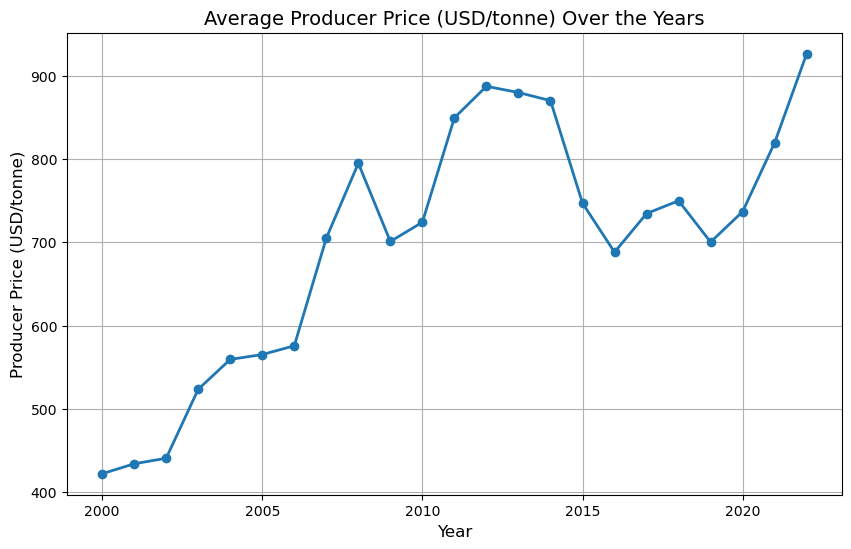

In [17]:
# Filter data with available producer prices
price_data = final_dataset[['Year', 'Producer Price (USD/tonne)']].dropna()

# Group by year and calculate the mean producer price for each year
price_trend = price_data.groupby('Year')['Producer Price (USD/tonne)'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(price_trend.index, price_trend.values, marker='o', linestyle='-', linewidth=2)
plt.title('Average Producer Price (USD/tonne) Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Producer Price (USD/tonne)', fontsize=12)
plt.grid(True)
plt.show()

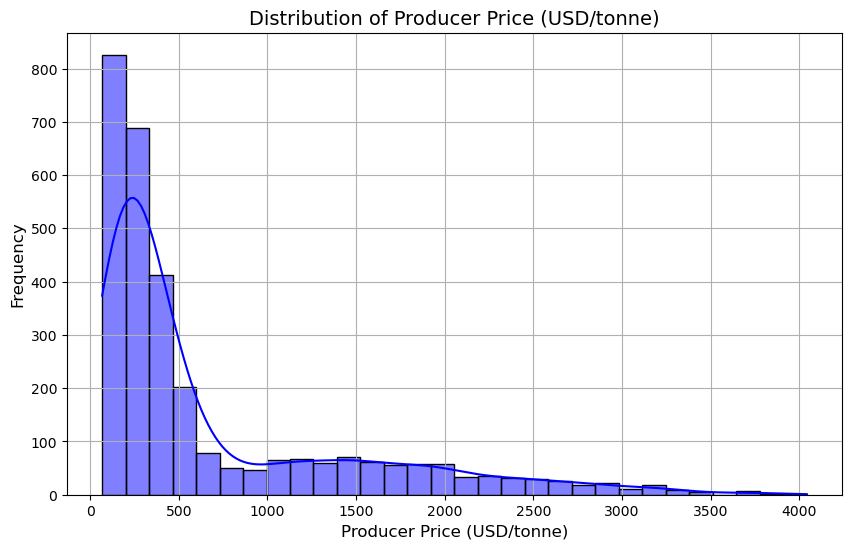

In [18]:
# Analyze the distribution of the 'Producer Price (USD/tonne)' column
plt.figure(figsize=(10, 6))
sns.histplot(final_dataset['Producer Price (USD/tonne)'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution of Producer Price (USD/tonne)', fontsize=14)
plt.xlabel('Producer Price (USD/tonne)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [19]:
# Median Imputation
median_value_new = final_dataset['Producer Price (USD/tonne)'].median()
data_median_imputed = final_dataset.copy()
data_median_imputed['Producer Price (USD/tonne)'].fillna(median_value_new, inplace=True)
median_yearly_avg = data_median_imputed.groupby('Year')['Producer Price (USD/tonne)'].mean()

In [20]:
# Mean Imputation
mean_value_new = final_dataset['Producer Price (USD/tonne)'].mean()
data_mean_imputed = final_dataset.copy()
data_mean_imputed['Producer Price (USD/tonne)'].fillna(mean_value_new, inplace=True)
mean_yearly_avg = data_mean_imputed.groupby('Year')['Producer Price (USD/tonne)'].mean()

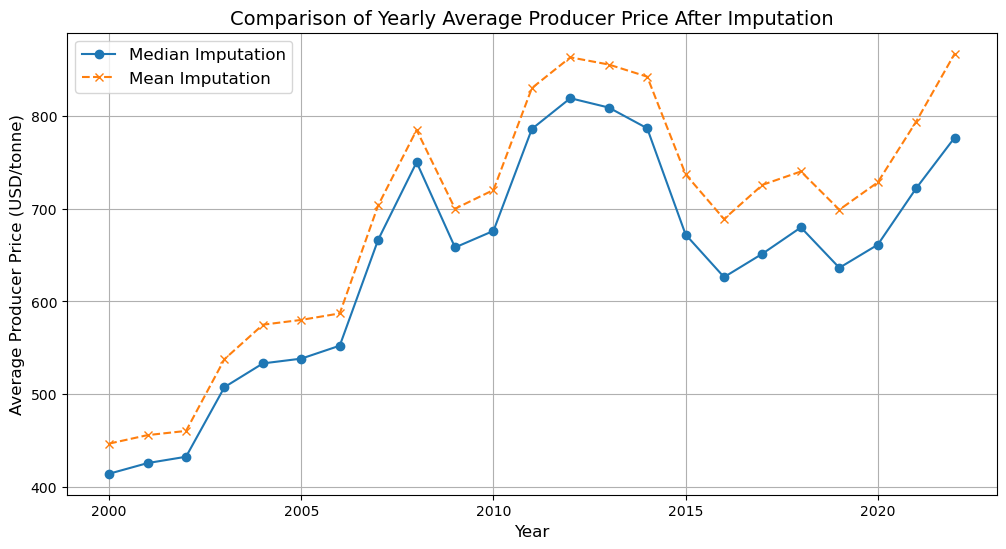

In [21]:
# Visualize Yearly Trends
plt.figure(figsize=(12, 6))
plt.plot(median_yearly_avg.index, median_yearly_avg.values, label='Median Imputation', marker='o', linestyle='-')
plt.plot(mean_yearly_avg.index, mean_yearly_avg.values, label='Mean Imputation', marker='x', linestyle='--')
plt.title('Comparison of Yearly Average Producer Price After Imputation', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Producer Price (USD/tonne)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

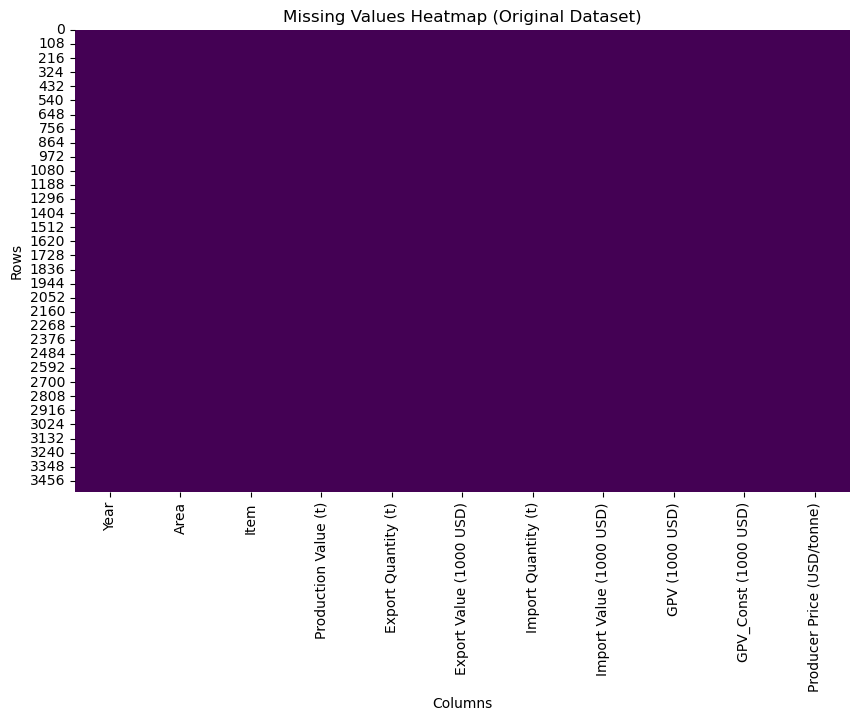

In [22]:
# Visualize missing values in the new dataset
plt.figure(figsize=(10, 6))
sns.heatmap(data_median_imputed.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Original Dataset)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [23]:
Agriculture_data = data_median_imputed

In [24]:
Agriculture_data.to_csv('Analysis/Agriculture_data.csv', index=False)